In [536]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [615]:
#loading the data
nba=pd.read_csv('nba_2013.csv')
print(np.shape(nba))

(481, 31)


In [538]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [539]:
nba.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [595]:
# replacing zero values with the mean of the column
nba['ft.']=nba['ft.'].fillna(nba['ft.'].mean())
nba['efg.']=nba['efg.'].fillna(nba['efg.'].mean())
nba['x2p.']=nba['x2p.'].fillna(nba['x2p.'].mean())
nba['x3p.']=nba['x3p.'].fillna(nba['x3p.'].mean())
nba['fg.']=nba['fg.'].fillna(nba['fg.'].mean())

In [596]:
# Selecting numerbical values 
nba_numeric =nba[['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.',
                 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']]
nba_numeric.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,0.660,72,144,216,28,23,26,30,122,171
1,20,81,20,1197,93,185,0.503,0,0,0.285111,...,0.581,142,190,332,43,40,57,71,203,265
2,27,53,12,961,143,275,0.520,0,0,0.285111,...,0.639,102,204,306,38,24,36,39,108,362
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,0.815,32,230,262,248,35,3,146,136,1330
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,0.836,94,183,277,40,23,46,63,187,328


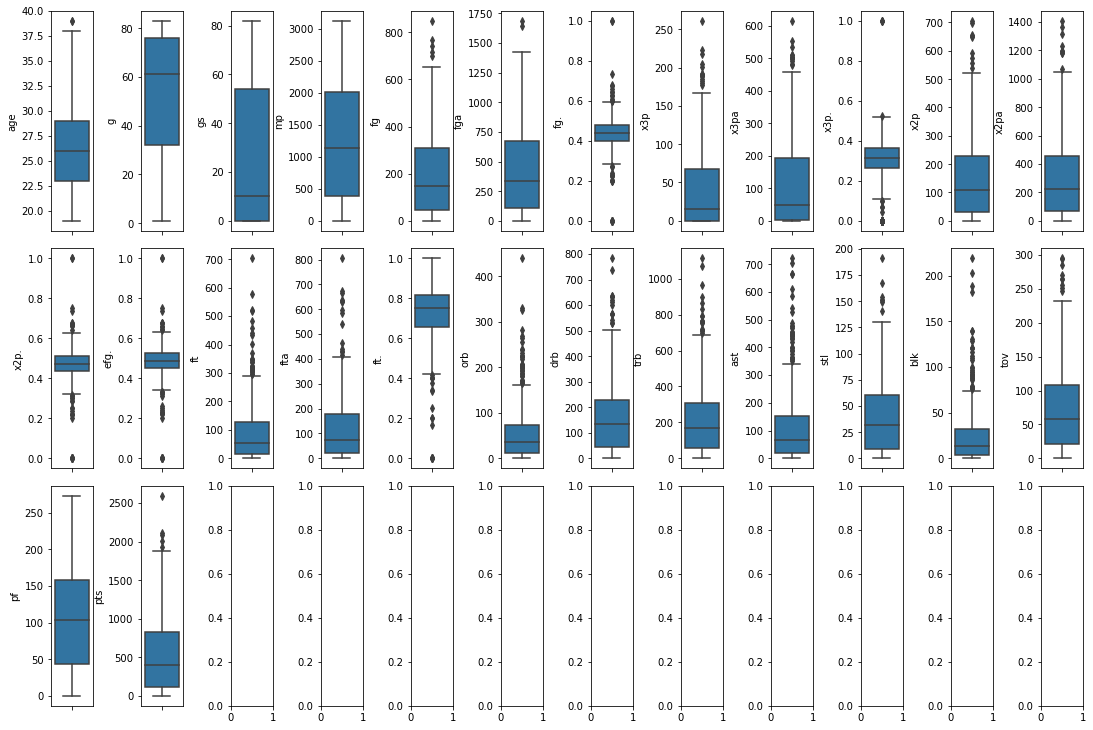

In [597]:
fig, axs = plt.subplots(ncols=12, nrows=3, figsize=(15, 10))
index = 0
axs = axs.flatten()
for k,v in nba_numeric.items():
    sns.boxplot(y=k, data=nba_numeric, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.2, w_pad=0.1, h_pad=1.0)

In [659]:
 for k, v in nba_numeric.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(nba_numeric)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column age outliers = 0.83%
Column g outliers = 0.00%
Column gs outliers = 0.00%
Column mp outliers = 0.00%
Column fg outliers = 1.04%
Column fga outliers = 0.42%
Column fg. outliers = 6.86%
Column x3p outliers = 3.12%
Column x3pa outliers = 2.49%
Column x3p. outliers = 15.80%
Column x2p outliers = 1.87%
Column x2pa outliers = 2.08%
Column x2p. outliers = 7.28%
Column efg. outliers = 6.86%
Column ft outliers = 5.82%
Column fta outliers = 2.91%
Column ft. outliers = 3.74%
Column orb outliers = 7.28%
Column drb outliers = 2.91%
Column trb outliers = 3.53%
Column ast outliers = 6.86%
Column stl outliers = 1.46%
Column blk outliers = 6.86%
Column tov outliers = 1.87%
Column pf outliers = 0.00%
Column pts outliers = 1.04%


In [664]:
nba_cleaned = nba_numeric[~((nba_numeric < (q1-1.5*irq)) | (nba_numeric > (q3+1.5*irq))).any(axis=1)]
for k, v in nba_cleaned.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(nba_cleaned)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column age outliers = 0.88%
Column g outliers = 0.00%
Column gs outliers = 9.68%
Column mp outliers = 0.00%
Column fg outliers = 0.59%
Column fga outliers = 1.17%
Column fg. outliers = 7.62%
Column x3p outliers = 5.87%
Column x3pa outliers = 3.81%
Column x3p. outliers = 16.42%
Column x2p outliers = 2.93%
Column x2pa outliers = 2.35%
Column x2p. outliers = 7.92%
Column efg. outliers = 8.50%
Column ft outliers = 4.40%
Column fta outliers = 3.52%
Column ft. outliers = 4.11%
Column orb outliers = 5.28%
Column drb outliers = 1.76%
Column trb outliers = 2.93%
Column ast outliers = 8.50%
Column stl outliers = 0.59%
Column blk outliers = 6.45%
Column tov outliers = 2.05%
Column pf outliers = 0.00%
Column pts outliers = 0.88%


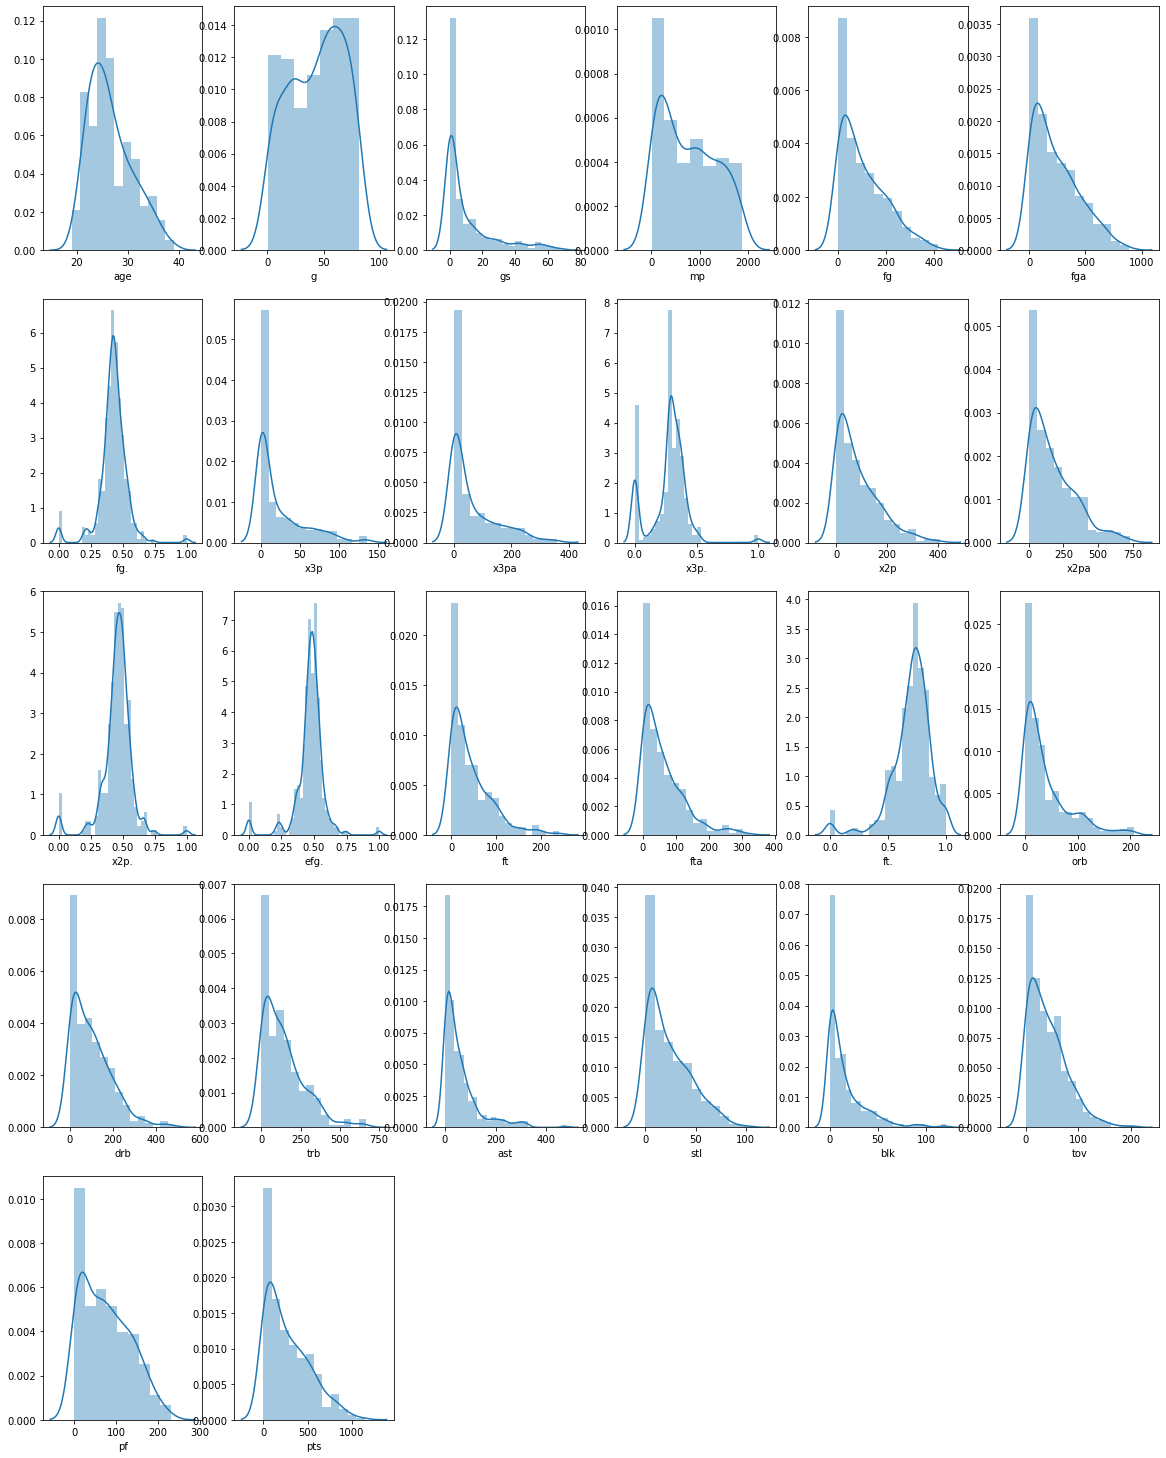

In [665]:
plt.figure(figsize=(20,26), facecolor='white')
plotnumber = 1

for column in nba_cleaned:
    if plotnumber>=1:
        ax = plt.subplot(5,6,plotnumber)
        sns.distplot(nba_cleaned[column])
        plt.xlabel(column,fontsize=10)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [666]:
X = nba_cleaned.drop(columns = ['pts'])
y=nba_cleaned['pts']

In [668]:
#standardizing the dataset
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [670]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

C:\Users\chaitvaidya\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif,Features
0,1.142066,age
1,7.580212,g
2,2.744680,gs
3,42.302065,mp
4,inf,fg
5,inf,fga
6,23.979798,fg.
7,inf,x3p
8,inf,x3pa
9,1.964719,x3p.


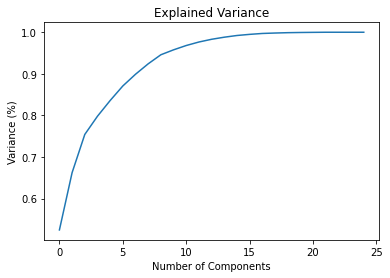

In [671]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [673]:
pca = PCA(n_components=5)
new_data = pca.fit_transform(X_scaled)
# This will be the new data fed to the algorithm.
PCA_X = pd.DataFrame(data = new_data
             , columns = ['PCA1','PCA2','PCA3','PCA4','PCA5'])
PCA_X

,PCA1,PCA2,PCA3,PCA4,PCA5
0,0.090250,1.490515,0.043743,-0.343513,-1.353898
1,3.296739,2.729546,-0.630357,-0.553422,-2.126693
2,2.194547,2.270537,-0.094136,-0.136035,-0.211220
3,2.594814,2.824470,-0.118500,-0.050250,-0.232277
4,-1.686551,1.591300,1.377150,-0.544760,-0.368361
...,...,...,...,...,...
336,0.778656,-1.737610,0.537323,0.789289,-1.116378
337,8.585477,-2.104385,-1.540061,-2.916740,2.501096
338,7.326098,-4.395117,0.558715,-1.536396,1.182610
339,4.749593,1.866112,-2.329448,-1.719746,0.007143


In [674]:
from sklearn.model_selection import train_test_split, GridSearchCV 
x_train,x_test,y_train,y_test = train_test_split(PCA_X,y, test_size= 0.25)

In [675]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

for k in range(12):
    k_value = k + 1
    knn = KNeighborsRegressor(n_neighbors = k_value)
    knn.fit(x_train, y_train)
    print ("Regression score is:",knn.score(x_train,y_train), knn.score(x_test,y_test),"for k-value",k_value)

Regression score is: 1.0 0.9391076541803863 for k-value 1
Regression score is: 0.9790493344907913 0.9475832296388284 for k-value 2
Regression score is: 0.9734946840490473 0.9547604559037961 for k-value 3
Regression score is: 0.9707373529695056 0.9590841240517667 for k-value 4
Regression score is: 0.9642462412291017 0.9608413919753577 for k-value 5
Regression score is: 0.9638697176516056 0.9612802578153192 for k-value 6
Regression score is: 0.9633018156903 0.9598082728815156 for k-value 7
Regression score is: 0.9609596805603495 0.9588724073346321 for k-value 8
Regression score is: 0.957848586479432 0.9594361882814951 for k-value 9
Regression score is: 0.9555132798051467 0.9546671350170579 for k-value 10
Regression score is: 0.9526381868638041 0.9556878128358108 for k-value 11
Regression score is: 0.9511372412276283 0.9503394849225648 for k-value 12


In [676]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : range(1,13)
              }

In [677]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=1 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=1, score=0.944, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=1 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=1, score=0.913, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=1 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=1, score=0.896, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=1 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=1, score=0.891, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=1 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=1, score=0.916, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=2, score=0.954, total=   0.0s
[CV] algorit

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=6, score=0.953, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=6 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=6, score=0.952, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=6 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=6, score=0.932, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=6 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=6, score=0.962, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=6 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=6, score=0.908, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.955, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.945, total= 

[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=6, score=0.962, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=6 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=6, score=0.908, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=7, score=0.955, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=7, score=0.945, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=7, score=0.930, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=7, score=0.955, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=7, score=0.917, total= 

[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, score=0.930, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, score=0.955, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, score=0.917, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=8 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=8, score=0.955, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=8 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=8, score=0.950, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=8 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=8, score=0.929, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=8 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=8, score=0.954, total= 

[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=7, score=0.917, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=8 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=8, score=0.955, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=8 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=8, score=0.950, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=8 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=8, score=0.929, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=8 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=8, score=0.954, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=8 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=8, score=0.914, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=9, score=0.955, total= 

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=9, score=0.940, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=9, score=0.923, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=9, score=0.947, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=9, score=0.910, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=10, score=0.952, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=10, score=0.938, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=10, score=0.921, tota

[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=9, score=0.910, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.952, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.938, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.921, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.950, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.914, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=11, score=0.945, t

[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=11, score=0.945, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=11, score=0.939, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=11, score=0.915, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=11, score=0.946, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=11, score=0.916, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=12, score=0.941, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=12, score=0.938, 

[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=12, score=0.938, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=12, score=0.918, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=12, score=0.942, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=12, score=0.916, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=1 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=1, score=0.944, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=1 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=1, score=0.913, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=1 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=1, score=0.896, total=   0.0s
[CV

[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=2, score=0.933, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=2 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=2, score=0.954, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=2 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=2, score=0.906, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=3, score=0.950, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=3, score=0.948, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=3, score=0.953, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=3, score=0.951, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=1, score=0.916, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=2 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=2, score=0.954, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=2 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=2, score=0.942, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=2 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=2, score=0.933, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=2 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=2, score=0.954, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=2 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=2, score=0.906, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=3, score=0.950, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, score=0.911, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=6 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=6, score=0.953, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=6 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=6, score=0.952, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=6 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=6, score=0.932, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=6 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=6, score=0.962, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=6 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=6, score=0.908, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=7, score=0.955, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=7, score=0.955, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=7, score=0.917, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=8 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=8, score=0.955, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=8 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=8, score=0.950, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=8 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=8, score=0.929, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=8 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=8, score=0.954, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=8 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=8, score=0.914, total=   0.0s
[CV] al

[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=10, score=0.950, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=10, score=0.914, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=11, score=0.945, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=11, score=0.939, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=11, score=0.915, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=11, score=0.946, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=11 .................
[CV]  algor

[CV]  algorithm=brute, leaf_size=20, n_neighbors=2, score=0.933, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=2, score=0.954, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=2, score=0.906, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=3, score=0.950, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=3, score=0.948, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=3, score=0.953, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=3, score=0.951, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=25, n_neighbors=1, score=0.891, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=1 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=1, score=0.916, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=2, score=0.954, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=2, score=0.942, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=2, score=0.933, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=2, score=0.954, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=2, score=0.906, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=27, n_neighbors=4, score=0.948, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=4 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=4, score=0.941, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=4 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=4, score=0.954, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=4 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=4, score=0.913, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=5, score=0.956, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=5, score=0.949, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=5, score=0.943, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=30, n_neighbors=6, score=0.952, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=6 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=6, score=0.932, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=6 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=6, score=0.962, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=6 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=6, score=0.908, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, score=0.955, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, score=0.945, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, score=0.930, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=32, n_neighbors=5, score=0.911, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=6 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=6, score=0.953, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=6 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=6, score=0.952, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=6 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=6, score=0.932, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=6 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=6, score=0.962, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=6 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=6, score=0.908, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=7, score=0.955, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=34, n_neighbors=5, score=0.949, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=5, score=0.943, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=5, score=0.963, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=5, score=0.911, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=6 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=6, score=0.953, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=6 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=6, score=0.952, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=6 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=6, score=0.932, total=   0.0s
[CV] algorithm=brute,

[Parallel(n_jobs=1)]: Done 1260 out of 1260 | elapsed:    9.8s finished


GridSearchCV(estimator=KNeighborsRegressor(n_neighbors=12),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': range(1, 13)},
             verbose=3)

In [678]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 3}

In [681]:
knn = KNeighborsRegressor(algorithm = 'ball_tree', leaf_size =18, n_neighbors =3
                        )
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=18, n_neighbors=3)

In [682]:
knn.score(x_train,y_train), knn.score(x_test,y_test)

(0.9734946840490473, 0.9547604559037961)